Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [7]:
# cell for imports. All imports must go here.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [5]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

0    549
1    342
Name: Survived, dtype: int64

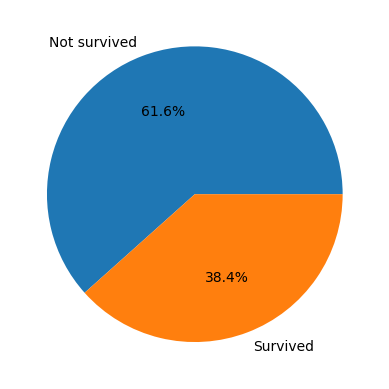

In [14]:
plt.pie(
    train["Survived"].value_counts(),
    labels=["Not survived", "Survived"],
    autopct="%1.1f%%"
)
train["Survived"].value_counts()

Я побудував pie chart за допомогою matplotlib з колонки "Survived", застосувавши перед цим функцію value_counts(). Щоб впевнетися у правильності labels, я вивів результати підрахунку на екран. Як результат, бачимо, що більшість пасажинів загинуло.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


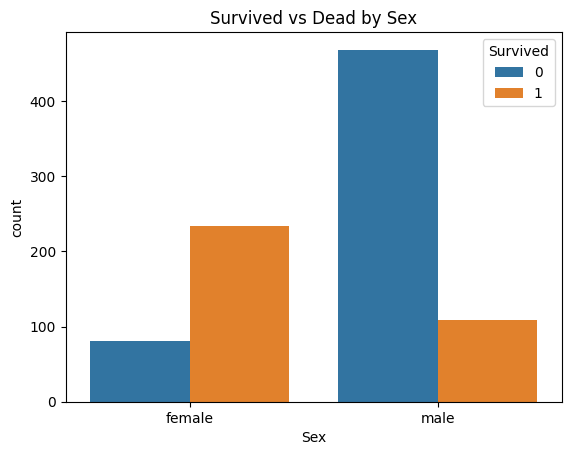

<Axes: xlabel='Sex', ylabel='Survived'>

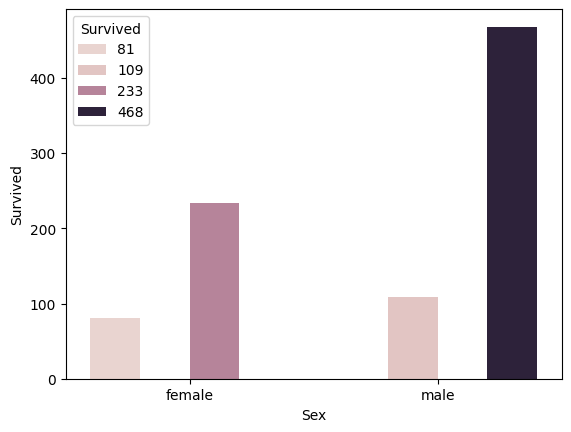

In [83]:
survived = train.groupby(['Sex', 'Survived'], as_index=False)['Survived'].count()
sns.barplot(data=survived, x="Sex", y="Survived", hue="Survived")

трохи не вийшло

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

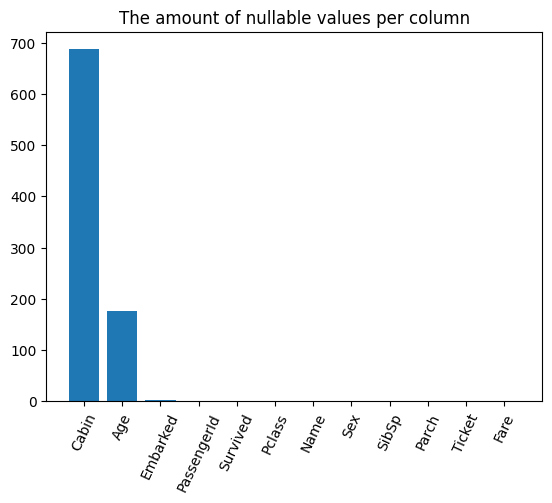

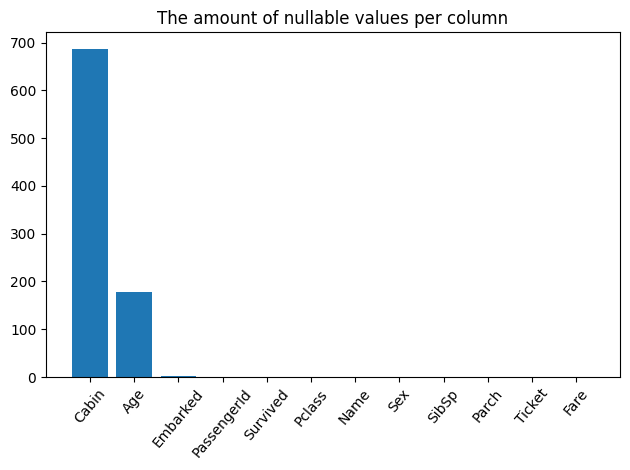

In [106]:
missing_values = train.isnull().sum().sort_values(ascending=False)

fig, ax = plt.subplots()
ax.bar(range(len(missing_values)), missing_values.values)

ax.set_xticks(range(len(missing_values)))
ax.set_xticklabels(missing_values.index, rotation=50)

ax.set_title("The amount of nullable values per column")

plt.tight_layout()
plt.show()

Як ми бачимо, з 891 значення, в колонці Cabin відсутніми є майже 700, що позбавляє сенсу її використання для аналізу даних.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

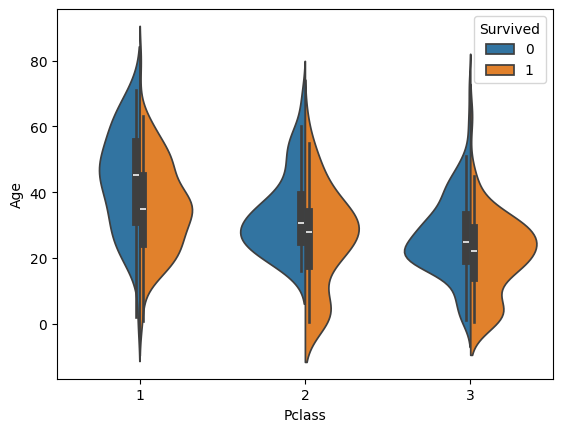

[Text(0.5, 1.0, 'Survived vs Dead by Age in different Classes')]

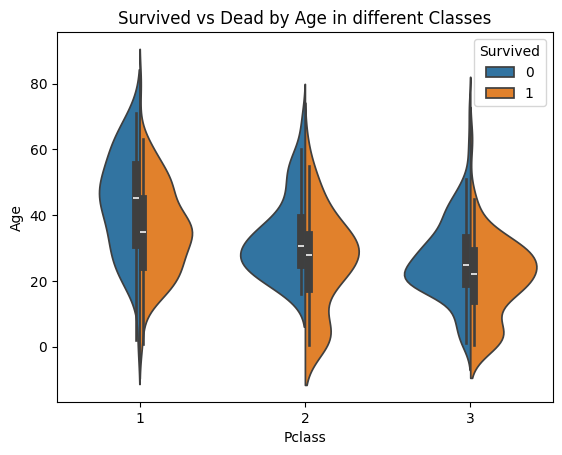

In [109]:
sns \
  .violinplot(data=train, x="Pclass", y="Age", hue="Survived", split=True) \
  .set(title="Survived vs Dead by Age in different Classes")

Тут можемо побачити якого віку найбільше загиблих або виживших у кожному класі

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


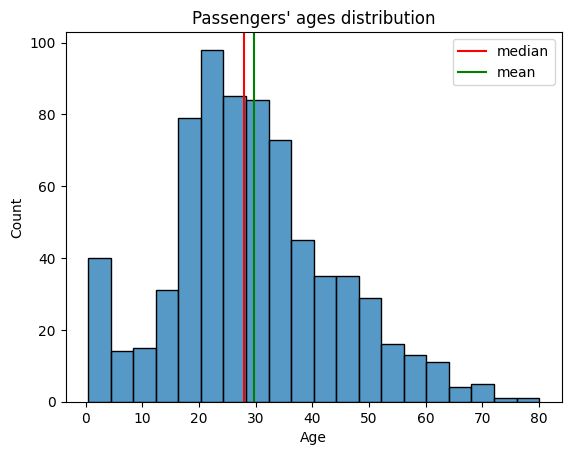

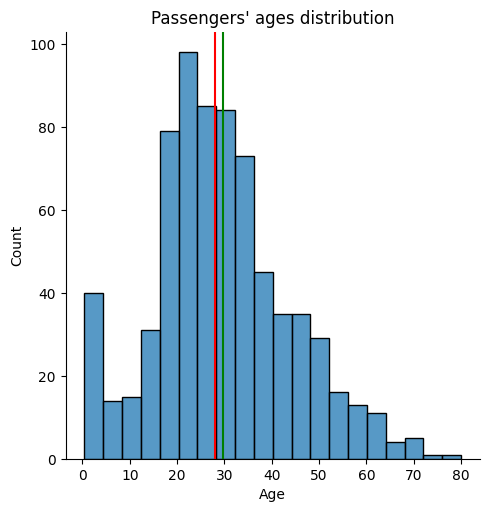

In [120]:
sns.displot(data=train, x="Age").set(title="Passengers' ages distribution")
plt.axvline(x=train["Age"].mean(), color="green")
plt.axvline(x=train["Age"].median(), color="red")

Найбільше було людей віком від 18 до 35 років, але також було досить багато дітей віком до 5 років.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

Який був розподіл вартості квитків

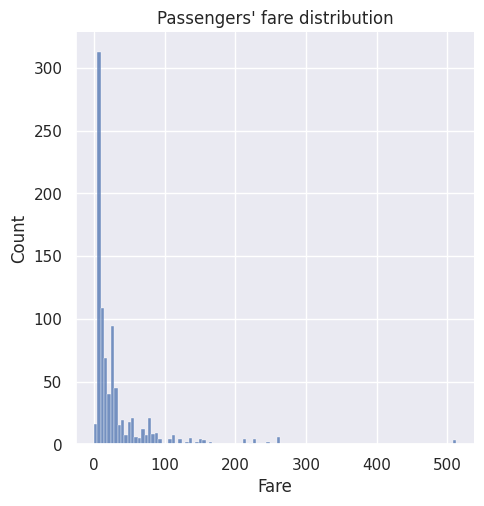

In [138]:
sns.displot(data=train, x="Fare").set(title="Passengers' fare distribution")

Найбільше пасажирів заплатили до 100 долларів

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

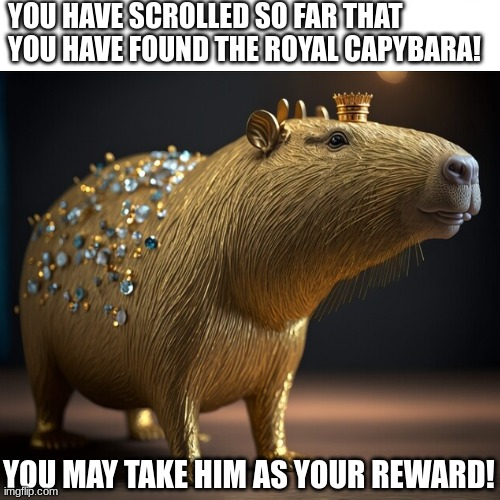